In [1]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('matrixdata.csv',
                    index_col = 0)

# Make a copy of the data frame
df_tr = df

# Standardize data with Z-score
clmns = ['action', 'strategy','rpg', 'indie', 'adventure', 'sports', 'simulation', 'mmo', 'free', 'casual']
df_tr_std = stats.zscore(df_tr[clmns])

# Cluster the data
kmeans = KMeans(n_clusters=7, random_state=0).fit(df_tr_std)
labels = kmeans.labels_

# Insert respective clusters to the original data
df_tr['clusters'] = labels

# Add the cluster column
clmns.extend(['clusters'])

# Cluster analysis
print (df_tr[clmns].groupby(['clusters']).mean())

# Write dataframe to file
df_tr.to_csv('out.csv')

               action     strategy          rpg        indie    adventure  \
clusters                                                                    
0           78.892205    25.935692    25.739586    38.999881    33.973141   
1            9.981570     1.146388     1.280442     1.672279     1.657157   
2          457.508459   195.029979   172.852478   453.640546   297.953992   
3          405.535032   194.242038   185.159236   489.707006   261.643312   
4         3114.183673  1328.081633  1055.959184  4329.469388  2416.367347   
5         1215.681159   511.930435   437.156522  1459.666667   898.342029   
6          209.865717    86.619322    79.053406   154.979139   114.384440   

              sports  simulation         mmo        free       casual  
clusters                                                               
0           2.606434   15.324202    6.507741   10.198828     9.788783  
1           0.161171    0.745859    0.515402    0.843512     0.464935  
2          19.9421

Counter({1: 673839, 0: 67239, 6: 17545, 2: 3369, 5: 345, 3: 157, 4: 49})


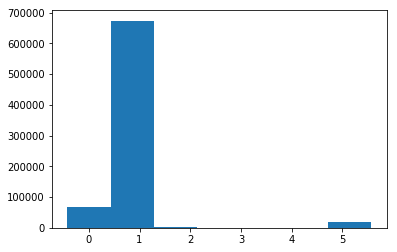

In [6]:
import collections

arr = df_tr.as_matrix(columns = df_tr.columns[10:])
arr = arr.ravel()

counter = collections.Counter(arr)

print(counter)

plt.hist(arr, bins=7, align='left')
plt.show()


In [25]:
# # Just plotting some stuff out
# sns.lmplot('action', 'strategy', 
#            data=df_tr, 
#            fit_reg=False, 
#            hue="clusters",  
#            scatter_kws={"marker": "D", 
#                         "s": 100})
# plt.title('Clusters Action vs Strategy')
# plt.xlabel('Action')
# plt.ylabel('Strategy')

# plt.show()

# sns.lmplot('action', 'rpg', 
#            data=df_tr, 
#            fit_reg=False, 
#            hue="clusters",  
#            scatter_kws={"marker": "D", 
#                         "s": 100})
# plt.title('Clusters Action vs RPG')
# plt.xlabel('Action')
# plt.ylabel('RPG')

# plt.show()

# sns.lmplot('action', 'indie', 
#            data=df_tr, 
#            fit_reg=False, 
#            hue="clusters",  
#            scatter_kws={"marker": "D", 
#                         "s": 100})
# plt.title('Clusters Action vs Indie')
# plt.xlabel('Action')
# plt.ylabel('Indie')

# plt.show()